## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

def Camera_Calibration():
    nx,ny = 9,6
    images_path = glob.glob("./camera_cal/calibration*.jpg")
    #Generate object points(0,0,0),(0,1,0),(0,2,0)...(5,8,0)
    objpoints = np.zeros((ny*nx,3),np.float32)
    objpoints[:,:2] = np.transpose(np.meshgrid(np.arange(ny),np.arange(nx))).reshape(-1,2)
    objp_list = []
    imgp_list = []
    for fname in images_path:
        img = mpimg.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        retval,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
        
        if retval == True:
            objp_list.append(objpoints)
            imgp_list.append(corners)
#             cv2.drawChessboardCorners(img,(nx,ny),corners,retval)
#             plt.figure()
#             plt.imshow(img)
    imgsize = (img.shape[1],img.shape[0])
    retval,cameraMat,distCoeffs,rvecs,tvecs = cv2.calibrateCamera(objp_list,imgp_list,imgsize,None,None)
    return retval,cameraMat,distCoeffs,rvecs,tvecs
            

retval,cameraMat,distCoeffs,rvecs,tvecs = Camera_Calibration()

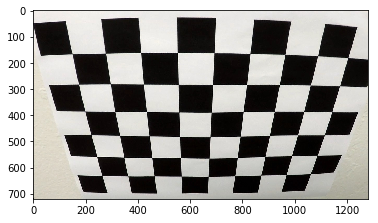

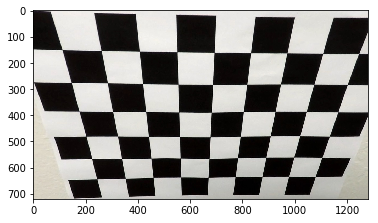

In [45]:
image = mpimg.imread("./camera_cal/calibration2.jpg")
dst = cv2.undistort(image,cameraMat,distCoeffs)
plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(dst)

In [44]:
?cv2.undistort

Docstring:
undistort(src, cameraMatrix, distCoeffs[, dst[, newCameraMatrix]]) -> dst
.   @brief Transforms an image to compensate for lens distortion.
.   
.   The function transforms an image to compensate radial and tangential lens distortion.
.   
.   The function is simply a combination of #initUndistortRectifyMap (with unity R ) and #remap
.   (with bilinear interpolation). See the former function for details of the transformation being
.   performed.
.   
.   Those pixels in the destination image, for which there is no correspondent pixels in the source
.   image, are filled with zeros (black color).
.   
.   A particular subset of the source image that will be visible in the corrected image can be regulated
.   by newCameraMatrix. You can use #getOptimalNewCameraMatrix to compute the appropriate
.   newCameraMatrix depending on your requirements.
.   
.   The camera matrix and the distortion parameters can be determined using #calibrateCamera. If
.   the resolution of images is 

In [5]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    img_size = (img.shape[1],img.shape[0])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         plt.imshow(img)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)

1.0298149716172809


Text(0.5,1,'Undistorted Image')

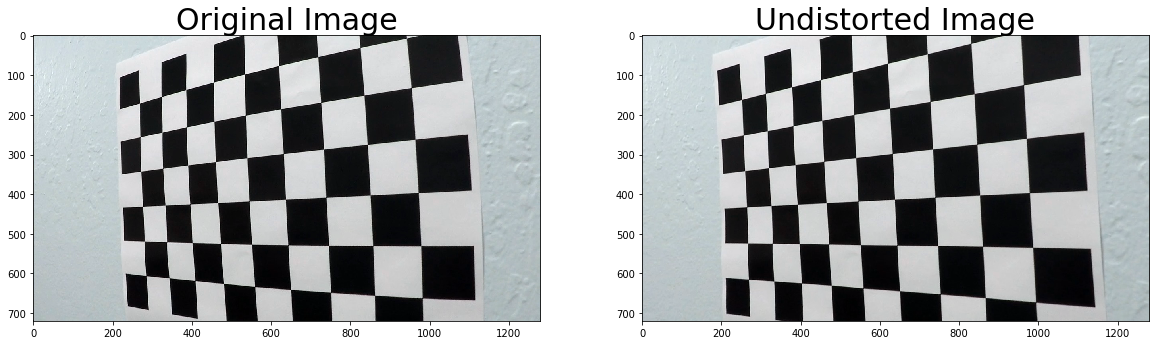

In [15]:
# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration4.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
# dist_pickle = {}
# dist_pickle["mtx"] = mtx
# dist_pickle["dist"] = dist
# pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [20]:
?glob.glob

Signature: glob.glob(pathname, *, recursive=False)
Docstring:
Return a list of paths matching a pathname pattern.

The pattern may contain simple shell-style wildcards a la
fnmatch. However, unlike fnmatch, filenames starting with a
dot are special cases that are not matched by '*' and '?'
patterns.

If recursive is true, the pattern '**' will match any files and
zero or more directories and subdirectories.
File:      c:\programdata\anaconda3\lib\glob.py
Type:      function
